In [134]:
!pip install nltk

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv("movies_dataset.csv")
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [137]:
df.shape

(4803, 24)

In [138]:
df.set_index( "index", inplace=True )

In [139]:
df.isnull().sum()

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

homepage is nothing but just link so ww will drop it

In [140]:
df.drop(['homepage'] , axis=1, inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4391 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [142]:
df['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [143]:
df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [144]:
df = df[df.status == "Released"]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4795 non-null   int64  
 1   genres                4767 non-null   object 
 2   id                    4795 non-null   int64  
 3   keywords              4386 non-null   object 
 4   original_language     4795 non-null   object 
 5   original_title        4795 non-null   object 
 6   overview              4792 non-null   object 
 7   popularity            4795 non-null   float64
 8   production_companies  4795 non-null   object 
 9   production_countries  4795 non-null   object 
 10  release_date          4794 non-null   object 
 11  revenue               4795 non-null   int64  
 12  runtime               4793 non-null   float64
 13  spoken_languages      4795 non-null   object 
 14  status                4795 non-null   object 
 15  tagline              

## int df starts here

In [146]:
## get all numeric columns\
int_cols = [col for col in df.columns if df[col].dtype != 'object']
int_df = df[int_cols]

In [147]:
int_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,,,,,,,
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,220000,9367,14.269792,2040920,81.0,6.6,238
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6


In [148]:
int_df.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [149]:
int_df.runtime = int_df.runtime.fillna(int_df.runtime.mean)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## obj_df

In [150]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
obj_df = df[ obj_cols ]

In [151]:
obj_df.head(2)

,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew,director
index,,,,,,,,,,,,,,,
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


convert this column data to suitable form

In [152]:


def convert_string_dict_to_dict(sr):
    lis = []
    word = ""
    i = 0
    while i < (len(sr)-3):
        if sr[i:i+4] == "name":
            i = i + 8
            while sr[i]!='"':
                word += sr[i]
                i+=1
            lis.append(word)
            word = ""
        else:
            i += 1
    return lis

obj_df.production_countries = obj_df.production_countries.apply(convert_string_dict_to_dict)

#convert_string_dict_to_dict(obj_df.production_countries[0])

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [153]:
obj_df.production_companies = obj_df.production_companies.apply(convert_string_dict_to_dict)

In [154]:
obj_df.shape

(4795, 15)

we need to apply data extraction func for spoken languages column too

In [155]:
obj_df.spoken_languages[0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [156]:
def  string_dict_to_dict(sr):
    lis = []
    word = ""
    i = 0
    while i < (len(sr)-3):
        if sr[i:i+9] == "iso_639_1":
            i = i + 13
            while sr[i]!='"':
                word += sr[i]
                i+=1
            lis.append(word)
            word = ""
        else:
            i += 1
    return lis



In [157]:
obj_df.spoken_languages = obj_df.spoken_languages.apply(string_dict_to_dict )

In [158]:
obj_df.shape

(4795, 15)

In [159]:
obj_df.crew.iloc[0]

'[{\'name\': \'Stephen E. Rivkin\', \'gender\': 0, \'department\': \'Editing\', \'job\': \'Editor\', \'credit_id\': \'52fe48009251416c750aca23\', \'id\': 1721}, {\'name\': \'Rick Carter\', \'gender\': 2, \'department\': \'Art\', \'job\': \'Production Design\', \'credit_id\': \'539c47ecc3a36810e3001f87\', \'id\': 496}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Sound Designer\', \'credit_id\': \'54491c89c3a3680fb4001cf7\', \'id\': 900}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Supervising Sound Editor\', \'credit_id\': \'54491cb70e0a267480001bd0\', \'id\': 900}, {\'name\': \'Mali Finn\', \'gender\': 1, \'department\': \'Production\', \'job\': \'Casting\', \'credit_id\': \'539c4a4cc3a36810c9002101\', \'id\': 1262}, {\'name\': \'James Horner\', \'gender\': 2, \'department\': \'Sound\', \'job\': \'Original Music Composer\', \'credit_id\': \'5544ee3b925141499f0008fc\', \'id\': 1729}, {\'name\': \'James

In [160]:
### crew is so lengthy not worth adding in recommondation model

In [161]:
obj_df.drop(columns = ['crew'] , inplace= True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [162]:
obj_df = obj_df.reset_index()

In [163]:
obj_df.release_date = obj_df.release_date.fillna("0000-00-00")
int_df['year']  = obj_df.release_date.apply( lambda x :   int(x.split("-")[0]) ) 
int_df['month'] = obj_df.release_date.apply( lambda x :   int(x.split("-")[1]) )  
int_df['day']   = obj_df.release_date.apply( lambda x :   int(x.split("-")[2]) ) 

C:\Users\Dell\AppData\Local\Temp/ipykernel_9536/2345292243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df['year']  = obj_df.release_date.apply( lambda x :   int(x.split("-")[0]) )
C:\Users\Dell\AppData\Local\Temp/ipykernel_9536/2345292243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df['month'] = obj_df.release_date.apply( lambda x :   int(x.split("-")[1]) )
C:\Users\Dell\AppData\Local\Temp/ipykernel_9536/2345292243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [164]:
int_df.head(3)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,day
index,,,,,,,,,,
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,2009.0,12.0,10.0
1,300000000,285,139.082615,961000000,169.0,6.9,4500,2007.0,5.0,19.0
2,245000000,206647,107.376788,880674609,148.0,6.3,4466,2015.0,10.0,26.0


drop release date column from obj_df

In [165]:
obj_df.drop(columns = ['release_date'],inplace=True)

In [166]:
obj_df.drop(columns = ['status'],inplace=True)

In [167]:
obj_df.genres = obj_df.genres.fillna("")

In [168]:
dic = {}
for i in obj_df.genres:
    p = i.split()
    for j in p:
        if j in dic:
            dic[j] += 1
        else:
            dic[j] = 1

In [169]:
dic

{'Action': 1152,
 'Adventure': 790,
 'Fantasy': 418,
 'Science': 529,
 'Fiction': 529,
 'Crime': 696,
 'Drama': 2292,
 'Thriller': 1257,
 'Animation': 234,
 'Family': 509,
 'Western': 80,
 'Comedy': 1718,
 'Romance': 889,
 'Horror': 519,
 'Mystery': 347,
 'History': 197,
 'War': 142,
 'Music': 183,
 'Documentary': 109,
 'Foreign': 34,
 'TV': 8,
 'Movie': 8}

In [170]:
obj_df.cast.isnull().sum()

41

In [171]:
obj_df.cast  =obj_df.cast.fillna("")

In [172]:
## select top 4 actor from each moovie

def select_top_4(sent):
    actor , lis , cnt  = "" , [] , 0
    for i in sent:
        if i == " ":
            cnt += 1
            if cnt == 2:
                lis.append(actor)
                actor = ""
                cnt = 0
        else:
            actor += i
    return lis[:4]

obj_df.cast = obj_df.cast.apply(select_top_4)


In [173]:
obj_df.cast

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, L\u00e9aSeydoux,...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4790    [CarlosGallardo, Jaimede, HoyosPeter, Marquard...
4791    [EdwardBurns, KerryBish\u00e9, MarshaDietlein,...
4792    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4793     [DanielHenney, ElizaCoupe, BillPaxton, AlanRuck]
4794    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Name: cast, Length: 4795, dtype: object

In [174]:
act_df = pd.DataFrame(list(obj_df.cast.values),columns=['act1',"act2","act3","act4"])

In [175]:
act_df

,act1,act2,act3,act4
0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang
1,JohnnyDepp,OrlandoBloom,KeiraKnightley,StellanSkarsg\u00e5rd
2,DanielCraig,ChristophWaltz,L\u00e9aSeydoux,RalphFiennes
3,ChristianBale,MichaelCaine,GaryOldman,AnneHathaway
4,TaylorKitsch,LynnCollins,SamanthaMorton,WillemDafoe
...,...,...,...,...
4790,CarlosGallardo,Jaimede,HoyosPeter,MarquardtReinol
4791,EdwardBurns,KerryBish\u00e9,MarshaDietlein,CaitlinFitzgerald
4792,EricMabius,KristinBooth,CrystalLowe,GeoffGustafson
4793,DanielHenney,ElizaCoupe,BillPaxton,AlanRuck


In [176]:
int_df = int_df.reset_index()

In [177]:
int_df = pd.concat([ int_df,act_df],axis = 1  )

In [178]:
int_df['dir'] = obj_df['director']

In [179]:
int_df.head(2)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,day,act1,act2,act3,act4,dir
0,0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,2009.0,12.0,10.0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,James Cameron
1,1,300000000,285,139.082615,961000000,169.0,6.9,4500,2007.0,5.0,19.0,JohnnyDepp,OrlandoBloom,KeiraKnightley,StellanSkarsg\u00e5rd,Gore Verbinski


In [180]:
int_df['genres'] = obj_df.genres
int_df['keywords'] = obj_df.keywords

In [181]:
df= int_df

In [182]:
list(df.genres.values)

['Action Adventure Fantasy Science Fiction',
 'Adventure Fantasy Action',
 'Action Adventure Crime',
 'Action Crime Drama Thriller',
 'Action Adventure Science Fiction',
 'Fantasy Action Adventure',
 'Animation Family',
 'Action Adventure Science Fiction',
 'Adventure Fantasy Family',
 'Action Adventure Fantasy',
 'Adventure Fantasy Action Science Fiction',
 'Adventure Action Thriller Crime',
 'Adventure Fantasy Action',
 'Action Adventure Western',
 'Action Adventure Fantasy Science Fiction',
 'Adventure Family Fantasy',
 'Science Fiction Action Adventure',
 'Adventure Action Fantasy',
 'Action Comedy Science Fiction',
 'Action Adventure Fantasy',
 'Action Adventure Fantasy',
 'Action Adventure',
 'Adventure Fantasy',
 'Adventure Fantasy',
 'Adventure Drama Action',
 'Drama Romance Thriller',
 'Adventure Action Science Fiction',
 'Thriller Action Adventure Science Fiction',
 'Action Adventure Science Fiction Thriller',
 'Action Adventure Thriller',
 'Action Adventure Fantasy',
 'Actio

In [183]:
df['title'] = obj_df.title

In [184]:
df.head(2)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,day,act1,act2,act3,act4,dir,genres,keywords,title
0,0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,2009.0,12.0,10.0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,James Cameron,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar
1,1,300000000,285,139.082615,961000000,169.0,6.9,4500,2007.0,5.0,19.0,JohnnyDepp,OrlandoBloom,KeiraKnightley,StellanSkarsg\u00e5rd,Gore Verbinski,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End


In [185]:
df['cast'] = obj_df.cast

In [186]:
df.head(1)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,day,act1,act2,act3,act4,dir,genres,keywords,title,cast
0,0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,2009.0,12.0,10.0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,James Cameron,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."


## experimentation starts here


In [187]:
dfn = df.set_index("id")
dfn.drop(columns = "index",inplace = True)

<AxesSubplot:>

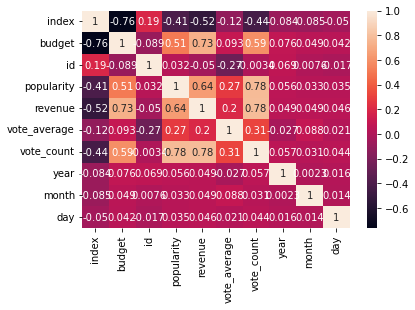

In [188]:
sns.heatmap(df.corr(),annot= True)

In [189]:
## budget revenue popularity strongly correlate with vote count
## release day will not mater much like of month and year

In [190]:
dfn.drop(columns = ['budget','popularity','revenue','day'] , inplace = True)

In [191]:
dfn.drop(columns = ['runtime','month'],inplace = True)

In [192]:
dic

{'Action': 1152,
 'Adventure': 790,
 'Fantasy': 418,
 'Science': 529,
 'Fiction': 529,
 'Crime': 696,
 'Drama': 2292,
 'Thriller': 1257,
 'Animation': 234,
 'Family': 509,
 'Western': 80,
 'Comedy': 1718,
 'Romance': 889,
 'Horror': 519,
 'Mystery': 347,
 'History': 197,
 'War': 142,
 'Music': 183,
 'Documentary': 109,
 'Foreign': 34,
 'TV': 8,
 'Movie': 8}

In [193]:
dfn.head(2)

,vote_average,vote_count,year,act1,act2,act3,act4,dir,genres,keywords,title,cast
id,,,,,,,,,,,,
19995,7.2,11800,2009.0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,James Cameron,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
285,6.9,4500,2007.0,JohnnyDepp,OrlandoBloom,KeiraKnightley,StellanSkarsg\u00e5rd,Gore Verbinski,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste..."


In [194]:
for i in dic.keys():
    dfn[i] = 0

In [195]:
for i in dfn.index:
    for j in dfn.loc[i,'genres'].split():
        dfn.loc[i,j] = 1

In [196]:


dfn.drop(columns=['genres'],inplace = True)
dfn = dfn.fillna("")

In [197]:
dfn.keywords

id
19995     culture clash future space war space colony so...
285       ocean drug abuse exotic island east india trad...
206647           spy based on novel secret agent sequel mi6
49026     dc comics crime fighter terrorist secret ident...
49529     based on novel mars medallion space travel pri...
                                ...                        
9367      united states\u2013mexico barrier legs arms pa...
72766                                                      
231617    date love at first sight narration investigati...
126186                                                     
25975                  obsession camcorder crush dream girl
Name: keywords, Length: 4795, dtype: object

In [198]:
dfn.head(2)

,vote_average,vote_count,year,act1,act2,act3,act4,dir,keywords,title,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV,Movie
id,,,,,,,,,,,,,,,,,,,,,
19995,7.2,11800,2009.0,SamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,James Cameron,culture clash future space war space colony so...,Avatar,...,0,0,0,0,0,0,0,0,0,0
285,6.9,4500,2007.0,JohnnyDepp,OrlandoBloom,KeiraKnightley,StellanSkarsg\u00e5rd,Gore Verbinski,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,...,0,0,0,0,0,0,0,0,0,0


In [200]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [202]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [203]:
## remove stopwords and lemmatize
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def remove_stopwords(sent):
    sent = sent.split()
    stop_words = set(stopwords.words('english'))
    sent = [w for w in sent if not w in stop_words]
    return sent

def lemmatize(sent):
    lemmatizer = WordNetLemmatizer()
    sent = [lemmatizer.lemmatize(w) for w in sent]
    return sent

dfn.keywords = dfn.keywords.apply(lambda x : remove_stopwords(x))
dfn.keywords  = dfn.keywords.apply(lambda x : lemmatize(x))


AttributeError: 'list' object has no attribute 'split'

In [ ]:
dfn.keywords

In [ ]:
dfn.keywords = dfn.keywords.apply(lambda x : " ".join(x))

In [ ]:
dfn.keywords

In [ ]:

uniq_keys = {}

for i in dfn.index:
    for j in dfn.loc[i,'keywords'].split():
        if j in uniq_keys:
            uniq_keys[j] += 1
        else:
            uniq_keys[j] = 1
uniq_keys


In [ ]:
len(uniq_keys)

In [ ]:
## sort the dictionary according to the value in reverse order
sorted_keys = sorted(uniq_keys.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
sorted_keys[500]

## size of vector is taken 200 here


In [ ]:
"""
## countvectorizer with stopwords and lemmatize and remove stopwords and n features 200
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = CountVectorizer(stop_words="english",max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(dfn.keywords)"""


##3 tfidf vectorizer with stopwords and lemmatize and remove stopwords and n features 200
from sklearn.feature_extraction.text import TfidfVectorizer
## preprocess the data
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(dfn.keywords)

df_key = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names())

final = pd.concat([dfn.reset_index(),df_key],axis = 1)
final = final.drop(columns=['keywords'])
final.drop(columns=['title'],inplace = True)
final  = final.drop(columns=['cast'])
final = final.set_index('id')


In [ ]:
final.head(3)

In [ ]:
def year(x):
    if x == "":
        return 0
    else:
        return int(x)
final.year = final.year.apply(lambda x : year(x))

In [ ]:
final['vote_average'] =  final.vote_average.apply(lambda x : (x - final.vote_average.min() ) / (final.vote_average.max() - final.vote_average.min()))
final.vote_count = final.vote_count.apply(lambda x : (x - final.vote_count.min() ) / (final.vote_count.max() - final.vote_count.min()))
final.year = final.year.apply(lambda x : (x - final.year.min() ) / (final.year.max() - final.year.min()))

In [ ]:
final.head()

In [ ]:
### calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

class recommondation_model:
    def __init__(s,pf):
        s.pf = pf

    def map_dir(s,name):
        s.pf.dir = s.pf.dir.apply(lambda x : 1 if x == name else 0)

    def map_actor(s,id):
        for act in ['act1','act2','act3','act4']:
            for type in ['act1','act2','act3','act4']:
                s.pf[type] = s.pf[type].apply(lambda x : 1 if x == s.pf.loc[id,act] else x) 
        for type in ['act1','act2','act3','act4']:
            s.pf[type] = s.pf[type].apply(lambda x : 0 if x != 1 else x)      
        

    def recommond_operations(s,id):
        s.map_dir(s.pf.loc[id,'dir'])
        print(0)
        s.map_actor(id)
        s.pf = s.pf.iloc[:,:-1]
        return s.pf

def main_recommendation( name ):
    id = dfn.loc[dfn.title == name].index.values[0]
    model = recommondation_model( final.copy() )
    new_df = model.recommond_operations(id)#.iloc[:,3:]
    cos = cosine_similarity(new_df,new_df)
    
    indices = {}
    cnt = 0 
    for i in new_df.index:
        indices[i] = cnt
        cnt += 1

    new_df['cos_Score'] = cos[indices[id],:]
    new_df['title'] = dfn.title
    ## sort the according to one column
    new_df.sort_values(by = 'cos_Score',ascending = False,inplace = True)
    print(new_df[['title','cos_Score']].iloc[1:11,:])
    #return new_df

In [ ]:
name = 'Iron Man 3'
main_recommendation(name)